In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
import cv2
import random
import numpy as np
import glob

size_ = 64

jenis = [
    8, 16, 32, 64
]

model = Sequential()

model.add(Conv2D(jenis[0], (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(jenis[1], (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(jenis[2], (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(jenis[3], (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 62, activation = 'softmax'))

model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])

model.load_weights("kawi_output_[8, 16, 32, 64].h5")

In [2]:
x = []
y = []

list_folder = glob.glob("kawi_output/test/*")
for c, nama_folder in enumerate(list_folder):
    list_gambar = glob.glob(nama_folder+"/*.png")
    for nama_gambar in list_gambar:
        gambar = cv2.imread(nama_gambar)/255
        gambar = cv2.resize(gambar, (size_, size_))
        x.append(gambar)
        y.append(c)

x = np.array(x)
y = np.array(y)

In [3]:
dict_index_to_kelas = {0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'a',
 11: 'a1',
 12: 'ai',
 13: 'au',
 14: 'ba',
 15: 'bha',
 16: 'ca',
 17: 'cha',
 18: 'da',
 19: 'da2',
 20: 'dha',
 21: 'dot',
 22: 'e',
 23: 'e1',
 24: 'eop',
 25: 'eos',
 26: 'ga',
 27: 'gha',
 28: 'ha',
 29: 'i',
 30: 'i1',
 31: 'ja',
 32: 'jha',
 33: 'ka',
 34: 'kha',
 35: 'l',
 36: 'l1',
 37: 'la',
 38: 'ma',
 39: 'na',
 40: 'na2',
 41: 'na3',
 42: 'na4',
 43: 'o',
 44: 'o1',
 45: 'opening',
 46: 'pa',
 47: 'pha',
 48: 'r',
 49: 'r1',
 50: 'ra',
 51: 'sa',
 52: 'sa1',
 53: 'sa2',
 54: 'ta',
 55: 'ta2',
 56: 'tha2',
 57: 'u',
 58: 'u1',
 59: 'virama',
 60: 'wa',
 61: 'ya'}

In [4]:
y_pred = model.predict(x)

61/61 [==============================] - 1s 7ms/step


In [5]:
y_pred = [np.argmax(_) for _ in y_pred]

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

print (classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        31
           4       1.00      0.97      0.98        31
           5       1.00      1.00      1.00        31
           6       1.00      0.97      0.98        31
           7       1.00      0.97      0.98        31
           8       1.00      1.00      1.00        31
           9       0.97      1.00      0.98        31
          10       0.94      0.97      0.95        31
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        31
          14       0.97      1.00      0.98        31
          15       0.94      1.00      0.97        31
          16       1.00      1.00      1.00        31
          17       1.00    

In [9]:
print (confusion_matrix(y,y_pred))

[[31  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 1  0  0 ... 30  0  0]
 [ 0  0  0 ...  0 31  0]
 [ 0  0  0 ...  0  0 31]]


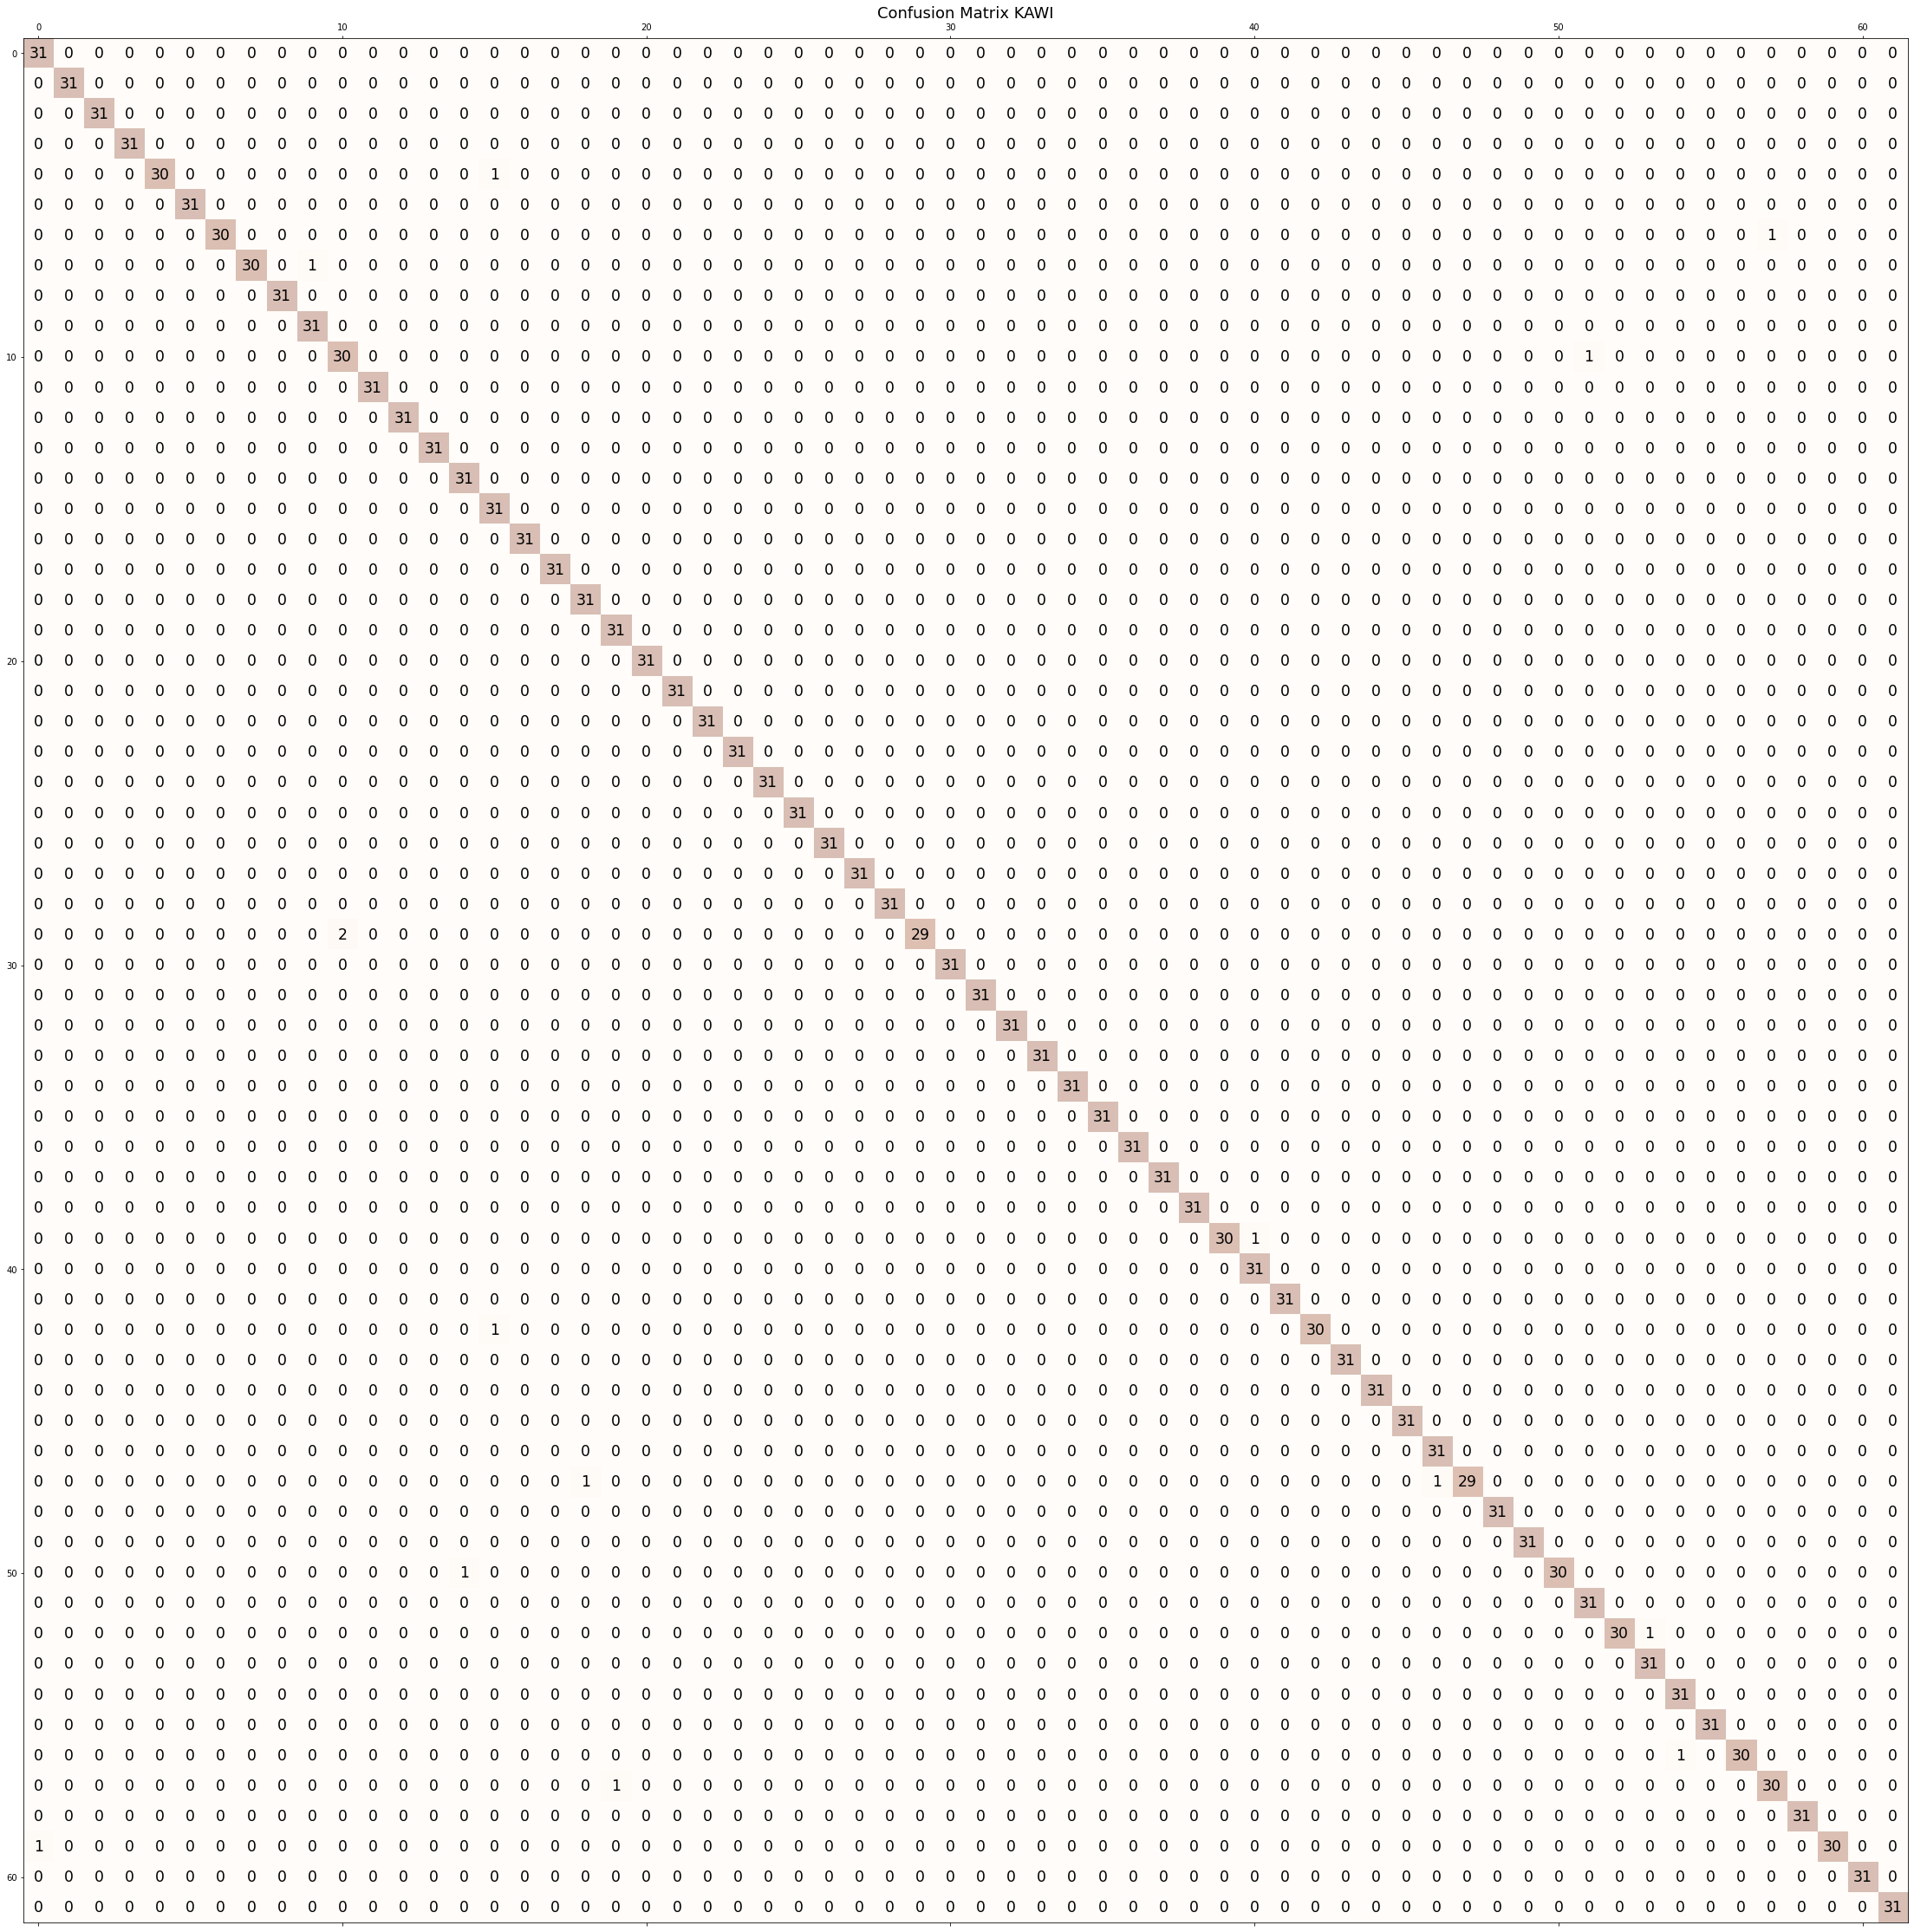

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(40, 40))
conf_matrix = confusion_matrix(y, y_pred)
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix KAWI', fontsize=18)
plt.show()